# Packages import

In [1]:
# Import package
import numpy as np
import scipy as sp
import os
import pandas as pd

import matplotlib.pyplot as plt
from my_package import my_functions  as mp
import warnings

from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import LinearSVR

warnings.filterwarnings('ignore')
%matplotlib inline

## Paths and filenames

In [2]:
# Define file path
Y_Fields_DataPath = '../../Gamaya_Data_Science_Assignment_v1_3_short/Y.csv'
X_Fields_DataPath = '../../Gamaya_Data_Science_Assignment_v1_3_short/X.csv'

## Data collection

In [3]:
# read Fields data
X_df = pd.read_csv(X_Fields_DataPath, header=None)
Y_df = pd.read_csv(Y_Fields_DataPath, header=None)

# translate to array
X = X_df.values
Y = Y_df.values

# Print shapes
print(X.shape)
print(Y.shape)

(50, 1000)
(50, 1)


# Display my Pipelines 
##(could be down with pipeline, but more understable this way)

## Huber Regression  

In [94]:
# Hyper-parameter initialization
degrees = np.arange(1,3)
alphas = np.logspace(-6, 8, num = 20)
CV = {'mode':KFold, 'arg':2}
Models = [[]]
Models_Scores = {'R2_train':[[]], 'MAE_train':[[]], 'R2_test':[[]], 'MAE_test':[[]]}

for id_d, degree in enumerate(degrees):
    
    # Initilize preprocessor
    Pre_processor = PolynomialFeatures(degree=degree,  interaction_only=False)
    Scaler = StandardScaler()
    
    # Preprocessing
    Xp = Pre_processor.fit_transform(X)
    Xp = Scaler.fit_transform(Xp)
    
    # Complexity loop initilization
    for id_a, alpha in enumerate(alphas):
        
        # Print info
        print('\rStart processing on: P. degree :{0:d} and Alphas run: {1:d}eme'
              .format(degree, id_a+1), end='')

        # Toolsets initialization
        CV_mode = CV['mode'](CV['arg'])

        Folds_score = {'R2_train':[], 'MAE_train':[], 'R2_test':[], 'MAE_test':[]}
        # Folding process start
        for train_index, test_index in CV_mode.split(Xp):

            # Model Initilisation
            #========================
            Model_Type = HuberRegressor(alpha=alpha)
            #========================

            # Training
            Model_Type.fit(Xp[train_index], Y[train_index])

            # Prediction and Scoring
            Y_test_Pred = Model_Type.predict(Xp[test_index])
            Y_train_Pred = Model_Type.predict(Xp[train_index])
            Folds_score['R2_test'].append(r2_score(Y[test_index], Y_test_Pred))
            Folds_score['MAE_test'].append(mean_absolute_error(Y[test_index], Y_test_Pred))
            Folds_score['R2_train'].append(r2_score(Y[train_index], Y_train_Pred))
            Folds_score['MAE_train'].append(mean_absolute_error(Y[train_index], Y_train_Pred))

        # Global model fiting
        #========================
        Global_Model = HuberRegressor(alpha=alpha)
        #========================
        Models[id_d].append(Global_Model.fit(Xp, Y))

        # Folds scores averaging
        Models_Scores['R2_train'][id_d].append(np.mean(Folds_score['R2_train']))
        Models_Scores['MAE_train'][id_d].append(np.mean(Folds_score['MAE_train']))
        Models_Scores['R2_test'][id_d].append(np.mean(Folds_score['R2_test']))
        Models_Scores['MAE_test'][id_d].append(np.mean(Folds_score['MAE_test']))

    # Update
    Models.append([])
    for k in Models_Scores.keys():
        Models_Scores[k].append([])




Start processing on: P. degree :2 and Alphas run: 20eme

In [96]:
np.save('HuberReg.npy', Models, Models_Scores)

In [ ]:
np.max([np.max(Models_Scores['R2_test'][i]) for i in len(Models_Scores['R2_test'])])

## Lasso Regression 

In [6]:
# Hyper-parameter initialization
degrees = np.arange(1,2)
alphas = np.logspace(-6, 8, num = 30)
CV = {'mode':KFold, 'arg':3}
Models = [[]]
Models_Scores = {'R2_train':[[]], 'MAE_train':[[]], 'R2_test':[[]], 'MAE_test':[[]]}

for id_d, degree in enumerate(degrees):
    
    Pre_processor = PolynomialFeatures(degree=degree,  interaction_only=False)
    Scaler = StandardScaler()
    
    # Preprocessing
    Xp = Pre_processor.fit_transform(X)
    Xp = Scaler.fit_transform(Xp)
    
    # Complexity loop initilization
    for id_a, alpha in enumerate(alphas):
        
        # Print info
        print('\rStart processing on: P. degree :{0:d} and Alphas run: {1:d}eme'
              .format(degree, id_a+1), end='')

        # Toolsets initialization
        CV_mode = CV['mode'](CV['arg'])

        Folds_score = {'R2_train':[], 'MAE_train':[], 'R2_test':[], 'MAE_test':[]}
        # Folding process start
        for train_index, test_index in CV_mode.split(Xp):

            # Model Initilisation
            #========================
            Model_Type = Lasso(alpha=alpha, fit_intercept=False)
            #========================

            # Training
            Model_Type.fit(Xp[train_index], Y[train_index])
            
            # Prediction and Scoring
            Y_test_Pred = Model_Type.predict(Xp[test_index])
            Y_train_Pred = Model_Type.predict(Xp[train_index])
            Folds_score['R2_test'].append(r2_score(Y[test_index], Y_test_Pred))
            Folds_score['MAE_test'].append(mean_absolute_error(Y[test_index], Y_test_Pred))
            Folds_score['R2_train'].append(r2_score(Y[train_index], Y_train_Pred))
            Folds_score['MAE_train'].append(mean_absolute_error(Y[train_index], Y_train_Pred))

        # Global model fiting
        #========================
        Global_Model = Lasso(alpha=alpha, fit_intercept=False)
        #========================
        Models[id_d].append(Global_Model.fit(Xp, Y))

        # Folds scores averaging
        Models_Scores['R2_train'][id_d].append(np.mean(Folds_score['R2_train']))
        Models_Scores['MAE_train'][id_d].append(np.mean(Folds_score['MAE_train']))
        Models_Scores['R2_test'][id_d].append(np.mean(Folds_score['R2_test']))
        Models_Scores['MAE_test'][id_d].append(np.mean(Folds_score['MAE_test']))
        
    # Update
    #Models.append([])
    #for k in Models_Scores.keys():
    #    Models_Scores[k].append([])




Start processing on: P. degree :1 and Alphas run: 30eme

In [161]:
np.save('Lasso.npy', Models, Models_Scores)

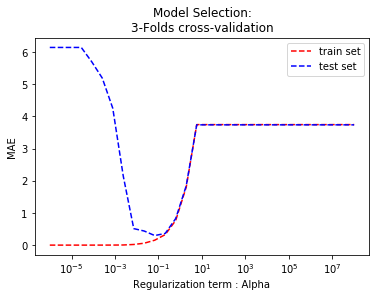

In [7]:
# Create model selection figure
plt.plot(alphas, Models_Scores['MAE_train'][0], 'r--', label='train set')
plt.plot(alphas, Models_Scores['MAE_test'][0], 'b--', label='test set')
plt.xscale('log')
plt.xlabel('Regularization term : Alpha')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Selection:\n3-Folds cross-validation')
plt.savefig('Figures/MSelection.png', dpi=100,  bbox_inches='tight')

# Model assessment with Leave One Out Cv

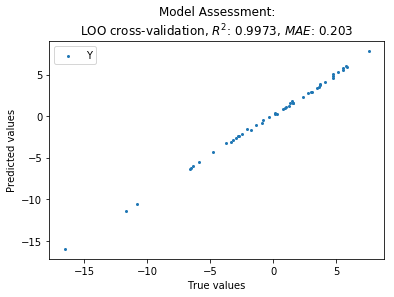

In [5]:
assert (np.argmax(Models_Scores['R2_test'][0]) == np.argmin(Models_Scores['MAE_test'][0]))
alpha = alphas[np.argmin(Models_Scores['MAE_test'][0])]

# Initilization
Y_pred = np.full(Y.shape, np.nan, Y.dtype)
Pre_processor = PolynomialFeatures(degree=degree,  interaction_only=False)
Scaler = StandardScaler()

# Preprocessing
Xp = Pre_processor.fit_transform(X)
Xp = Scaler.fit_transform(Xp)

# Launch model assessment
for train_index, test_index in LeaveOneOut().split(Xp):
    
    # Model initialization
    model = Lasso(alpha=alpha, fit_intercept=False)
    model.fit(Xp[train_index], Y[train_index])
    Y_pred[test_index] = model.predict(Xp[test_index])

# Create model assessment figure
R_score = r2_score(Y, Y_pred)
MAE_score = mean_absolute_error(Y, Y_pred)
plt.subplots()
plt.scatter(Y, Y_pred, s=4, label='Y')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Model Assessment:\nLOO cross-validation, $R^2$: {0:.4f}, $MAE$: {1:.3f}'.format(R_score, MAE_score))
plt.savefig('Figures/Validation.png', dpi=100,  bbox_inches='tight')

In [280]:
model.fit(Xp, Y)
Coef_Id = np.where(model.coef_!=0)[0]

print(['{0}x_{1:d} '.format(model.coef_[Id], Id) for Id in Coef_Id])

['-4.238083734233042x_419 ', '0.12676314375752235x_443 ', '0.4227794121505271x_619 ', '-0.9578839858410028x_752 ', '-0.007668282799136514x_815 ']


## Linear SVR

In [142]:
# Hyper-parameter initialization
degrees = np.arange(1,3)
alphas = np.logspace(-6, 8, num = 20)
CV = {'mode':KFold, 'arg':2}
Models = [[]]
Models_Scores = {'R2_train':[[]], 'MAE_train':[[]], 'R2_test':[[]], 'MAE_test':[[]]}

for id_d, degree in enumerate(degrees):
    
    Pre_processor = PolynomialFeatures(degree=degree,  interaction_only=False)
    Scaler = StandardScaler()
    
    # Preprocessing
    Xp = Pre_processor.fit_transform(X)
    Xp = Scaler.fit_transform(Xp)
    
    # Complexity loop initilization
    for id_a, alpha in enumerate(alphas):
        
        # Print info
        print('\rStart processing on: P. degree :{0:d} and Alphas run: {1:d}eme'
              .format(degree, id_a+1), end='')

        # Toolsets initialization
        CV_mode = CV['mode'](CV['arg'])

        Folds_score = {'R2_train':[], 'MAE_train':[], 'R2_test':[], 'MAE_test':[]}
        # Folding process start
        for train_index, test_index in CV_mode.split(Xp):

            # Model Initilisation
            #========================
            Model_Type = LinearSVR(C=alpha, loss='epsilon_insensitive')
            #========================

            # Training
            Model_Type.fit(Xp[train_index], Y[train_index])

            # Prediction and Scoring
            Y_test_Pred = Model_Type.predict(Xp[test_index])
            Y_train_Pred = Model_Type.predict(Xp[train_index])
            Folds_score['R2_test'].append(r2_score(Y[test_index], Y_test_Pred))
            Folds_score['MAE_test'].append(mean_absolute_error(Y[test_index], Y_test_Pred))
            Folds_score['R2_train'].append(r2_score(Y[train_index], Y_train_Pred))
            Folds_score['MAE_train'].append(mean_absolute_error(Y[train_index], Y_train_Pred))

        # Global model fiting
        #========================
        Global_Model = LinearSVR(C=alpha, loss='epsilon_insensitive')
        #========================
        Models[id_d].append(Global_Model.fit(Xp, Y))

        # Folds scores averaging
        Models_Scores['R2_train'][id_d].append(np.mean(Folds_score['R2_train']))
        Models_Scores['MAE_train'][id_d].append(np.mean(Folds_score['MAE_train']))
        Models_Scores['R2_test'][id_d].append(np.mean(Folds_score['R2_test']))
        Models_Scores['MAE_test'][id_d].append(np.mean(Folds_score['MAE_test']))
        
    # Update
    Models.append([])
    for k in Models_Scores.keys():
        Models_Scores[k].append([])




Start processing on: P. degree :2 and Alphas run: 20eme

In [143]:
np.save('SVR.npy', Models, Models_Scores)